# Task:
### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

# Boston House Price Prediction

## Step 1: Importing Python libraries and dataset

In [19]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.tools.plotting import scatter_matrix # data processing, scatter matrix 
import statsmodels.api as sm # Python module that provides classes and functions for the estimation of many different 
#statistical models, as well as for conducting statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

## Step 2: Understanding the data

### Feature descriptions:
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per 10,000 USD
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

### First impression of the data

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Missing Data - NaN Values

In [11]:
# Find number of NaN values for each feature
df.isna().sum().sort_values(ascending=False)

medv       0
lstat      0
b          0
ptratio    0
tax        0
rad        0
dis        0
age        0
rm         0
nox        0
chas       0
indus      0
zn         0
crim       0
dtype: int64

In [12]:
df.shape

(506, 14)

### Missing Data - Zero Values

In [13]:
# Find number of 0.0 values for each feature
for i in df.columns:
    print(i, list(df[i].values).count(0))

crim 0
zn 372
indus 0
chas 471
nox 0
rm 0
age 0
dis 0
rad 0
tax 0
ptratio 0
b 0
lstat 0
medv 0


   ### Data Cleaning

In [22]:
# removing all rows that contain values >= 50 for medv as an unknown barrier seems to exist, falsifying the data
df = df[df["medv"] < 50]
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Understanding the house values

//anaconda3/envs/nf/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.0093188 , 0.0046594 , 0.0046594 , 0.        , 0.0093188 ,
        0.02329699, 0.        , 0.03261579, 0.01397819, 0.        ,
        0.01397819, 0.01397819, 0.01863759, 0.01863759, 0.0093188 ,
        0.03261579, 0.0093188 , 0.02795639, 0.04193458, 0.03727518,
        0.05125338, 0.04659398, 0.03261579, 0.03261579, 0.02795639,
        0.03261579, 0.04193458, 0.03261579, 0.04193458, 0.03727518,
        0.05591278, 0.06057217, 0.07920977, 0.06523157, 0.09318796,
        0.06989097, 0.06989097, 0.04193458, 0.08852856, 0.06057217,
        0.06989097, 0.08852856, 0.06057217, 0.05125338, 0.06989097,
        0.06057217, 0.0093188 , 0.        , 0.01397819, 0.02329699,
        0.01397819, 0.01863759, 0.02329699, 0.01863759, 0.02329699,
        0.01397819, 0.02329699, 0.01863759, 0.01397819, 0.01397819,
        0.02329699, 0.0093188 , 0.01397819, 0.01397819, 0.03261579,
        0.0046594 , 0.        , 0.0093188 , 0.02329699, 0.0093188 ,
        0.0046594 , 0.02329699, 0.        , 0.01

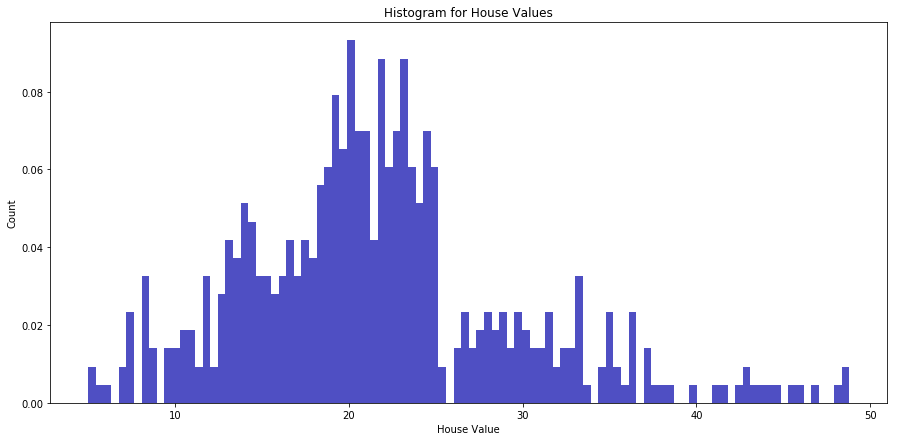

In [23]:
plt.figure(figsize=(15,7))
plt.xlabel('House Value')
plt.ylabel('Count')
plt.title('Histogram for House Values')
plt.hist(df["medv"], bins=100, normed=True, alpha=0.7, color="#0504aa")

### Dependency of value on the given features

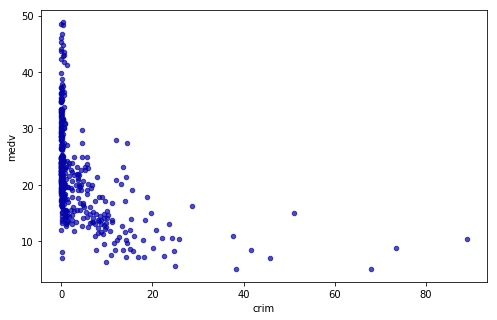

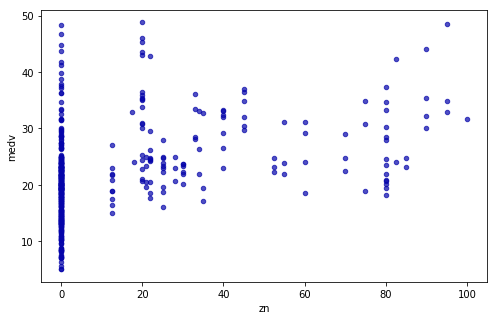

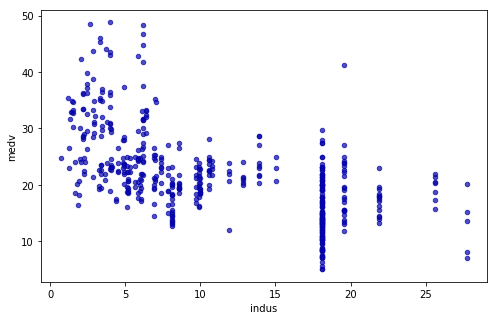

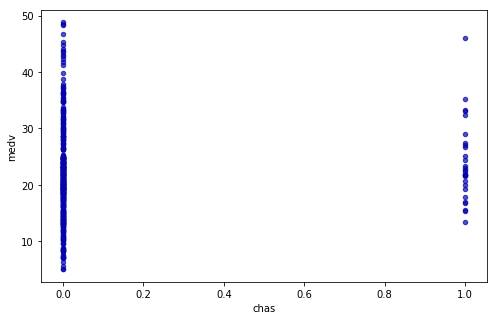

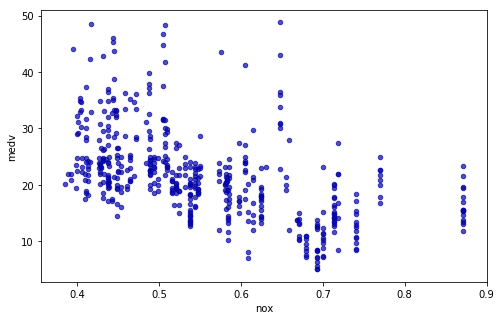

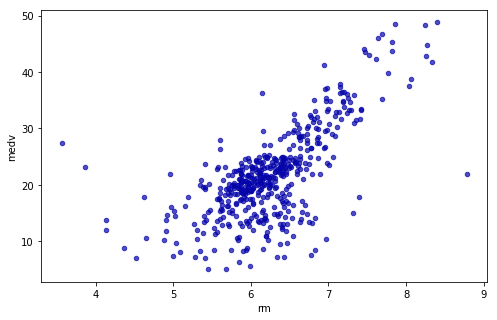

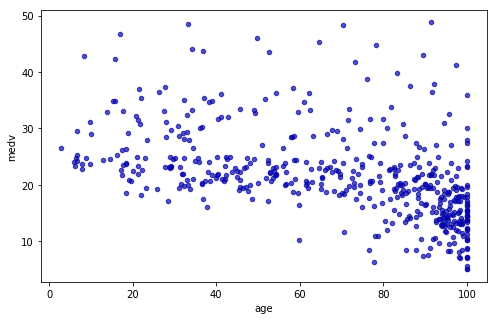

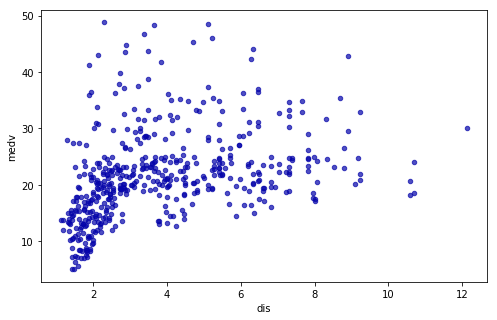

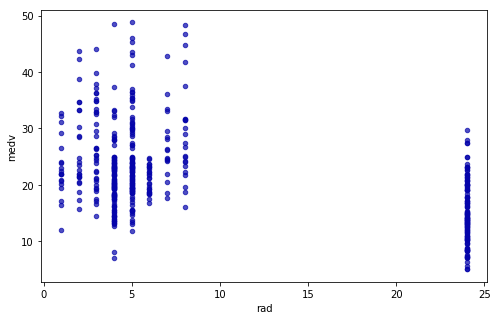

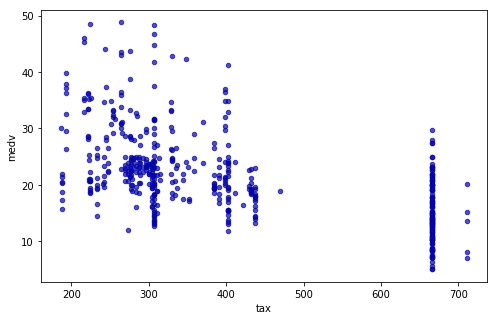

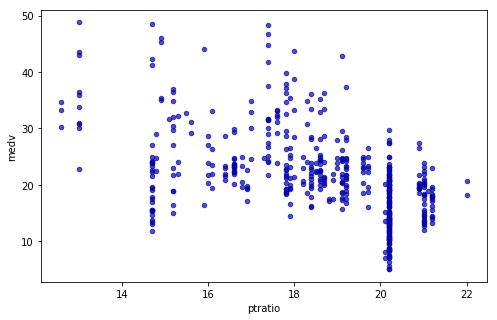

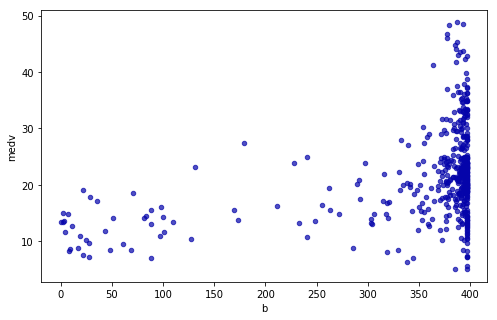

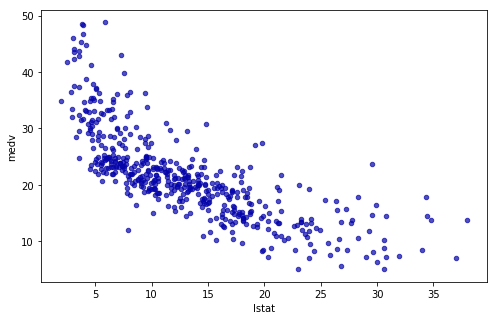

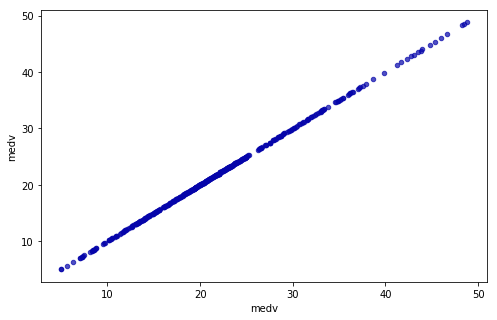

In [24]:
# Plotting the house price depency relative to every single feature gives a first idea of the relevant features
# and highlights the categorial variables.
for i in list(df.columns):
    df.plot(kind='scatter', x=i, y='medv', figsize=(8, 5), alpha=0.7, color="#0504aa")

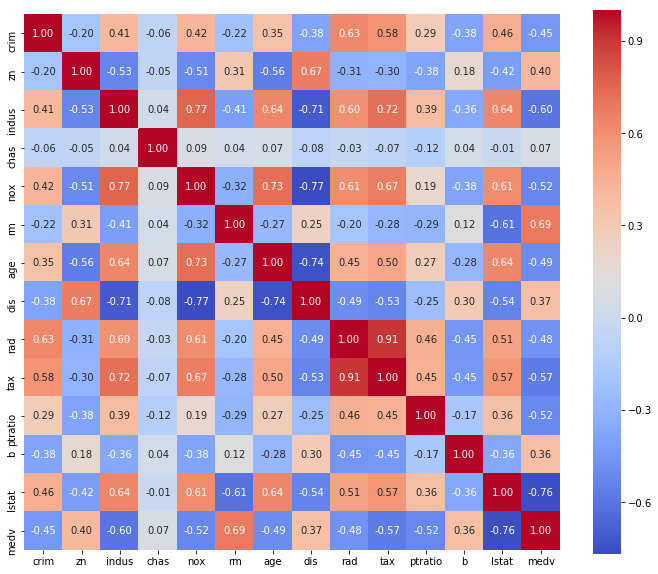

In [25]:
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True, fmt='.2f', annot_kws={'size': 10}, square=True, cmap="coolwarm")

In [20]:
model = LinearRegression(fit_intercept=True)

In [21]:
# print features and their correlation with the house prices in an ascending order
most_correlated_indices = list(reversed((df.corr().get("medv")).sort_values(ascending=True)[0:15].index))
most_correlated_values = list(reversed((df.corr().get("medv")).sort_values(ascending=True)[0:15].values))
most_correlated = dict(zip(most_correlated_indices, most_correlated_values))
most_correlated

{'medv': 1.0,
 'rm': 0.6953599470715394,
 'zn': 0.3604453424505447,
 'b': 0.33346081965706653,
 'dis': 0.24992873408590394,
 'chas': 0.1752601771902975,
 'age': -0.3769545650045959,
 'rad': -0.3816262306397776,
 'crim': -0.3883046085868114,
 'nox': -0.42732077237328164,
 'tax': -0.46853593356776646,
 'indus': -0.483725160028373,
 'ptratio': -0.507786685537561,
 'lstat': -0.7376627261740143}

### Some clearly correlated features that are non-categorial:

* LSTAT    % lower status of the population

# Modeling Step 1: Simple Linear Regression

In [30]:
# 1. Choose / import a class of model

from sklearn.linear_model import LinearRegression

In [31]:
# 2. Instanciate the model and choose model hyperparameters

model = LinearRegression(fit_intercept=True)

In [100]:
# 3. Arrange data into a features matrix and target vector

X_complete = df.drop('medv', axis=1)
X_lstat = df[['lstat']]
#y = df['medv']
y = df.medv

In [101]:
# 4. Fit the model to your data

model.fit(X_lstat, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
model.coef_

array([-0.84373838])

In [91]:
model.intercept_

32.5404103783323

In [92]:
xfit = np.linspace(0, 40)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

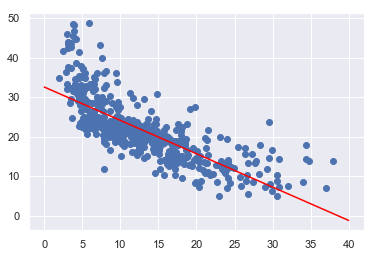

In [93]:
plt.scatter(X_lstat, y)
plt.plot(xfit, yfit, color="red")

# Modeling Step 1: Simple Polynomial Regression

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [102]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X_lstat, y, random_state=0,
                                  test_size=0.1)

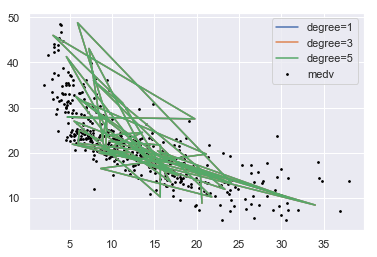

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

#X_test = np.linspace(0, 40, 500)[:, None]

plt.scatter(X_train, y_train, s = 3, color='black')
axis = plt.axis()
for i in [1, 3, 5]:
    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    y_predict = pol_reg.predict(X_test_poly)
    
    plt.plot(X_test, y_test, label='degree={0}'.format(i))
#plt.xlim(-0.1, 1.0)
#plt.ylim(-2, 12)
plt.legend(loc='best');

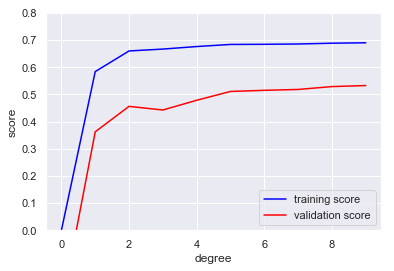

In [77]:
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

degree = np.arange(0, 10)
train_score, val_score = validation_curve(PolynomialRegression(), X_lstat, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 0.8)
plt.xlabel('degree')
plt.ylabel('score');